<a href="https://colab.research.google.com/github/StalkYy-06/5CS037-2024/blob/main/swarnim_rai_2414970_week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem - 1: Perform a classification task with knn from scratch.

In [ ]:
# mounting the drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#importing numpy and matplotlib
import numpy as np
import matplotlib.pyplot as plt
from timeit import timeit

#loading in provided dataset and importing in panda DataFrame.
import pandas as pd
df=pd.read_csv('/content/gdrive/My Drive/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Handeling any missing values appropriately, either by dropping or imputing them based on the data.

df.isnull().any()

# There are no missing values in the provided dataset


,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [ ]:
# Separate the feature matrix (X) and target variable (y).

x = df.drop(columns=['Outcome']).values
y = df['Outcome'].values

print(x)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [ ]:
# Perform a train - test split from scratch using a 70% − 30% ratio.

def train_test_split_scratch(x, y, test_size=0.3, random_seed=42):
  #setting the random seed
  np.random.seed(random_seed)

  #generating an array of indices corresponding to the rows of x
  indices = np.arange(x.shape[0])

  #shuffling the indices
  np.random.shuffle(indices)

  #calculating the number of test samples
  test_split_size = int( len(x)* test_size)

  #splitting the indices into test_indices(first part) and train_indices (remaining part)
  test_indices = indices[:test_split_size]
  train_indices = indices[test_split_size:]

  #splitting x and y into "x_train" and "x_test" , "y_train" and "y_test" using the indices
  x_train = x[train_indices]
  x_test = x[test_indices]
  y_train = y[train_indices]
  y_test = y[test_indices]

  return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split_scratch(x, y, test_size=0.3)

#printing the results shape to verify
print("Shape of x_train :",x_train.shape)
print("Shape of x_test :",x_test.shape)
print("Shape of y_train :",y_train.shape)
print("Shape of y_test :",y_test.shape)

Shape of x_train : (538, 8)
Shape of x_test : (230, 8)
Shape of y_train : (538,)
Shape of y_test : (230,)


In [ ]:
# defining a function to compute euclidean disance matrics

def euclidean_dis(x1, x2):
    # checking if the points are of same dimension
    if x1.shape != x2.shape:
      print("The points are should be of same dimension")
    # calculating distance
    distance = np.sqrt(np.sum(np.square(x1 - x2)))
    return distance

In [ ]:
# function for predicting the class for a single query

def knn_single_predict(query, x_train, y_train, k):

  # calculating the distance from query to all train point
  dis2= [euclidean_dis(query,x) for x in x_train]

  # Sorting the distance and getting the indices of the closest neigbour
  sorted_ind=np.argsort(dis2)

  # Selecting the indices of k's nearest neighbours
  nearest_ind=sorted_ind[:k]

  # Geting the corresponding labels
  nearest_l=[y_train[i] for i in nearest_ind]

  # Count the frequency of each label
  count=np.bincount(nearest_l)

  # Store the label with highest frequency in 'pred'
  pred =np.argmax(count)

  return pred

In [ ]:
# function for predicting the class for all test

def knn_predict(x_test, x_train, y_train, k):

  #Calling above function for each test point x
  preds=[knn_single_predict(x,x_train,y_train,k) for x in x_test]
  return np.array(preds)

In [ ]:
# function for calculating accuracy

def accuracy_calc(y_true, y_pred):

  # count the number of true values that corresponds to the true predictions
  correct = np.sum(y_true == y_pred)

  # number of total predictions
  true = len(y_true)

  # return the accuracy
  accuracy = (correct/true)*100
  return accuracy

In [ ]:
# performing the tests

try:
  #making the predictions
  predictions = knn_predict(x_test,x_train,y_train,k=3)

  #computing the accuracy
  accuracy = accuracy_calc(y_test,predictions)

  #displaying the accuracy
  print(f"Accuracy: {accuracy:.2f} %")

except Exception as e:
  print(e)

Accuracy: 67.39 %


# Problem 2: Experimentation

In [ ]:
# scaling the training data
x_min_train = x_train.min(axis=0)

x_max_train = x_train.max(axis=0)

x_train_scaled = (x_train - x_min_train) / (x_max_train - x_min_train)

#printing the scaled data
print(x_train_scaled)

[[0.29411765 0.38693467 0.67213115 ... 0.53353204 0.03330487 0.23333333]
 [0.05882353 0.47738693 0.49180328 ... 0.3561848  0.07771136 0.01666667]
 [0.29411765 0.52763819 0.59016393 ... 0.54992548 0.03458582 0.11666667]
 ...
 [0.58823529 0.50753769 0.70491803 ... 0.67958271 0.45175064 0.28333333]
 [0.         0.70854271 0.         ... 0.6318927  0.05422716 0.13333333]
 [0.         0.6281407  0.78688525 ... 0.33532042 0.07856533 0.        ]]


In [ ]:
# scaling the testing data
x_min_test = x_test.min(axis=0)

x_max_test = x_test.max(axis=0)

x_test_scaled = (x_test - x_min_test) / (x_max_test - x_min_test)

#printing the scaled data
print(x_test_scaled)

[[0.46153846 0.27205882 0.50877193 ... 0.59336824 0.22619048 0.47826087]
 [0.15384615 0.375      0.65789474 ... 0.62303665 0.03968254 0.        ]
 [0.15384615 0.34558824 0.56140351 ... 0.53752182 0.0462963  0.        ]
 ...
 [0.30769231 0.35294118 0.56140351 ... 0.60732984 0.54034392 0.10869565]
 [0.         0.48529412 0.70175439 ... 0.63350785 0.47354497 0.04347826]
 [0.46153846 0.32352941 0.61403509 ... 0.53752182 0.02248677 0.34782609]]


In [ ]:
# performing the predictions

try:
  predictions = knn_predict(x_test_scaled,x_train_scaled,y_train,k=3)

  accuracy = accuracy_calc(y_test,predictions)

  print(f"Accuracy: {accuracy:.2f} %")

except Exception as e:
  print(e)

Accuracy: 70.87 %


Scaling improves k-NN performance by making the range of all features the featured so they contribute equally to distance calculations, so there are no bias from larger-scale features. This leads to better neighbor selection and higher accuracy, as the algorithm can be more balanced and reliable.

# Problem 3:

In [ ]:
#Accuracy of original dataset
accuracy_original={}

#Iterating tgrough each values in k_values
for k in range(1,16):

  #Making predictions from the value of k
  predictions = knn_predict(x_test, x_train, y_train,k=k)

  #Caclculating accuracy
  accuracy= accuracy_calc(y_test,predictions)

  #Store the accuracy
  accuracy_original[k]=accuracy

  print(f"Accuracy for k={k}: {accuracy:.2f}")

Accuracy for k=1: 68.70
Accuracy for k=2: 72.61
Accuracy for k=3: 67.39
Accuracy for k=4: 72.17
Accuracy for k=5: 68.70
Accuracy for k=6: 70.00
Accuracy for k=7: 69.13
Accuracy for k=8: 71.30
Accuracy for k=9: 70.00
Accuracy for k=10: 71.74
Accuracy for k=11: 73.04
Accuracy for k=12: 73.91
Accuracy for k=13: 74.35
Accuracy for k=14: 72.61
Accuracy for k=15: 73.91


In [ ]:
# accuracy of the scaled dataset

scaled_accuracy={}

#iterating through each values in k_values
for k in range(1,16):

  #making predictions
  predictions = knn_predict(x_test_scaled, x_train_scaled, y_train,k=k)

  #calculating accuracy
  accuracy= accuracy_calc(y_test,predictions)

  #storing accuracy
  scaled_accuracy[k]=accuracy

  print(f"Accuracy for k={k}: {accuracy:.2f}")

Accuracy for k=1: 70.00
Accuracy for k=2: 70.43
Accuracy for k=3: 70.87
Accuracy for k=4: 71.74
Accuracy for k=5: 71.74
Accuracy for k=6: 73.48
Accuracy for k=7: 71.74
Accuracy for k=8: 74.35
Accuracy for k=9: 74.35
Accuracy for k=10: 74.35
Accuracy for k=11: 74.78
Accuracy for k=12: 73.04
Accuracy for k=13: 74.78
Accuracy for k=14: 74.78
Accuracy for k=15: 76.09


In [ ]:
# time taken for original dataset

original_time =[]

#iterating over the values in k_values
for k in range(1,16):

  # Timing the knn_predict function with the current k value
  time_taken = timeit("knn_predict(x_test, x_train, y_train, k=k)", globals=globals(), number=5)
  original_time.append(time_taken)
  print(f"Time taken for k={k}: {time_taken:.6f}")

Time taken for k=1: 4.025849
Time taken for k=2: 4.114821
Time taken for k=3: 6.119510
Time taken for k=4: 4.639671
Time taken for k=5: 4.070622
Time taken for k=6: 5.870558
Time taken for k=7: 4.045463
Time taken for k=8: 4.105317
Time taken for k=9: 5.903262
Time taken for k=10: 4.525344
Time taken for k=11: 4.153823
Time taken for k=12: 5.892295
Time taken for k=13: 4.114668
Time taken for k=14: 4.076020
Time taken for k=15: 5.904354


In [ ]:
# time for scaled dataset

scaled_time = []

# iterating over the values in k_values

for k in range(1, 16):
    time_taken = timeit("knn_predict(x_test_scaled, x_train_scaled, y_train, k=k)", globals=globals(), number=5)
    scaled_time.append(time_taken)
    print(f"Time taken for k={k}: {time_taken:.6f}")

Time taken for k=1: 4.720378
Time taken for k=2: 5.599932
Time taken for k=3: 4.083375
Time taken for k=4: 4.169511
Time taken for k=5: 5.801404
Time taken for k=6: 4.035781
Time taken for k=7: 4.091241
Time taken for k=8: 6.109984
Time taken for k=9: 4.007584
Time taken for k=10: 4.048825
Time taken for k=11: 5.851472
Time taken for k=12: 4.112790
Time taken for k=13: 4.025784
Time taken for k=14: 5.885246
Time taken for k=15: 4.065100


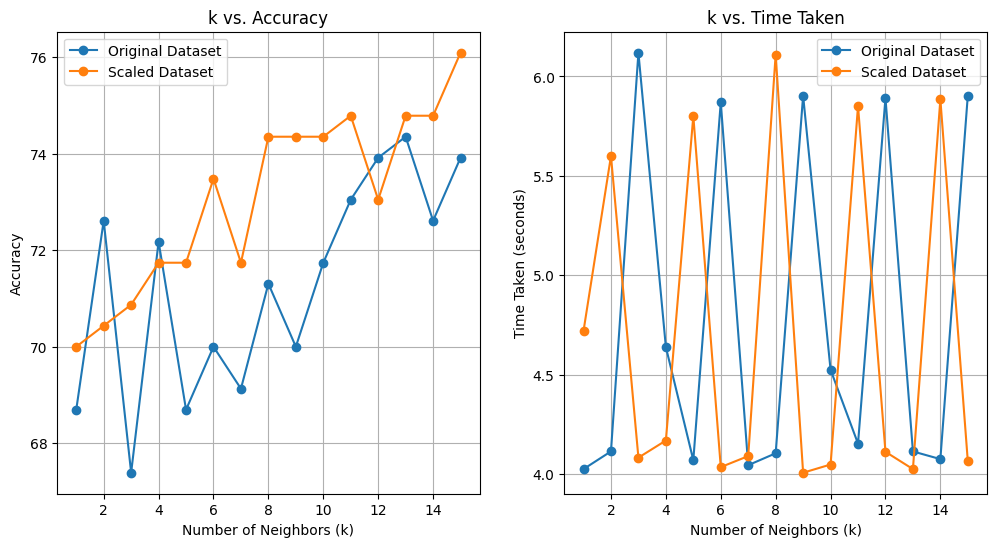

In [ ]:
k_values = range(1,16)
# Plotting k vs. Accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, list(accuracy_original.values()), label='Original Dataset', marker='o')
plt.plot(k_values, list(scaled_accuracy.values()), label='Scaled Dataset', marker='o')
plt.title('k vs. Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

# Plotting k vs. Time Taken
plt.subplot(1, 2, 2)
plt.plot(k_values, original_time, label='Original Dataset', marker='o')
plt.plot(k_values, scaled_time, label='Scaled Dataset', marker='o')
plt.title('k vs. Time Taken')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Time Taken (seconds)')
plt.legend()
plt.grid()